<a href="https://colab.research.google.com/github/jktb/DEEP--Tech-123/blob/main/DTTE_Colab_tutorial_14_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Perceptron and Gradient Descent
##Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
#print(X)
print(y)

[[ 6.33428778]
 [ 9.40527849]
 [ 8.48372443]
 [ 5.60438199]
 [ 4.71643995]
 [ 5.29307969]
 [ 5.82639572]
 [ 8.67878666]
 [ 6.79819647]
 [ 7.74667842]
 [ 5.03890908]
 [10.14821022]
 [ 8.46489564]
 [ 5.7873021 ]
 [ 5.18802735]
 [ 6.06907205]
 [ 5.12340036]
 [ 6.82087644]
 [ 6.19956196]
 [ 4.28385989]
 [ 7.96723765]
 [ 5.09801844]
 [ 5.75798135]
 [ 5.96358393]
 [ 5.32104916]
 [ 8.29041045]
 [ 4.85532818]
 [ 6.28312936]
 [ 7.3932017 ]
 [ 4.68275333]
 [ 9.53145501]
 [ 5.19772255]
 [ 4.64785995]
 [ 9.61886731]
 [ 7.87502098]
 [ 8.82387021]
 [ 5.88791282]
 [ 7.0492748 ]
 [ 7.91303719]
 [ 6.9424623 ]
 [ 4.69751764]
 [ 5.80238342]
 [ 5.34915394]
 [10.20785545]
 [ 6.34371184]
 [ 7.06574625]
 [ 7.27306077]
 [ 5.71855706]
 [ 7.86711877]
 [ 7.29958236]
 [ 8.82697144]
 [ 8.08449921]
 [ 9.73664501]
 [ 8.86548845]
 [ 6.03673644]
 [ 9.59980838]
 [ 3.4686513 ]
 [ 5.64948961]
 [ 3.3519395 ]
 [ 7.50191639]
 [ 5.54881045]
 [ 5.30603267]
 [ 9.78594227]
 [ 4.90965564]
 [ 5.91306699]
 [ 8.56331925]
 [ 3.23806

Let's also plot the data we just created

Text(0, 0.5, 'y')

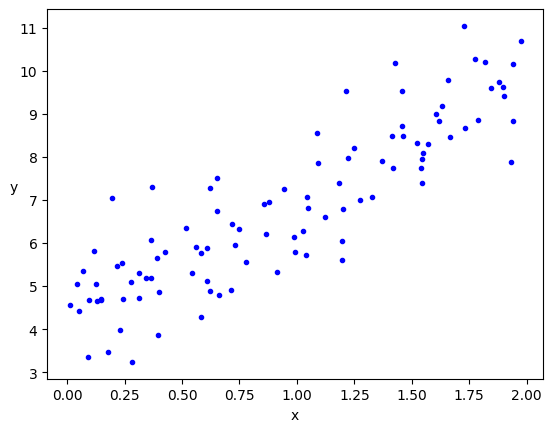

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

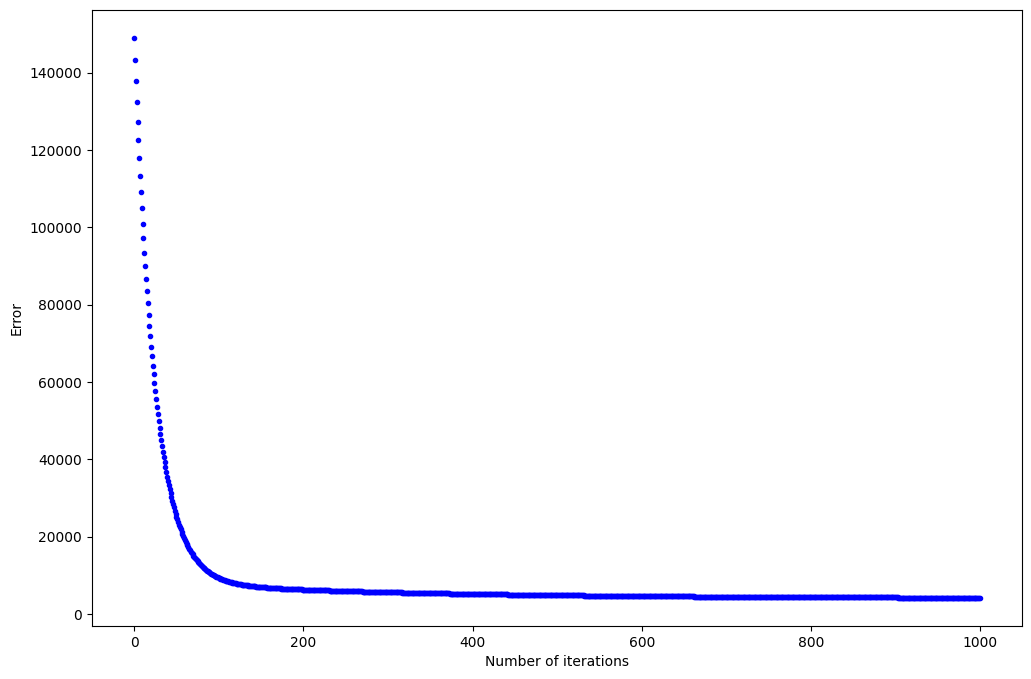

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

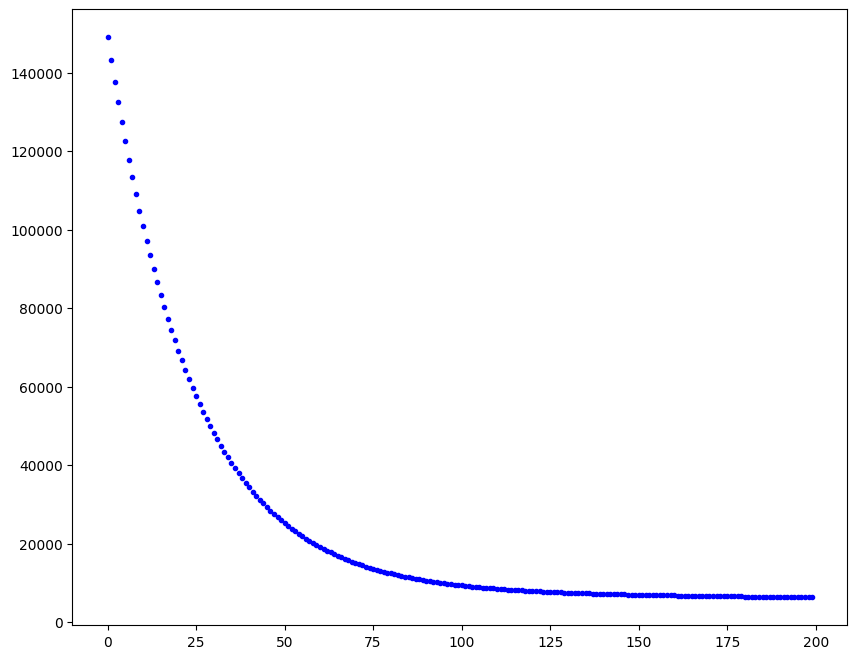

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


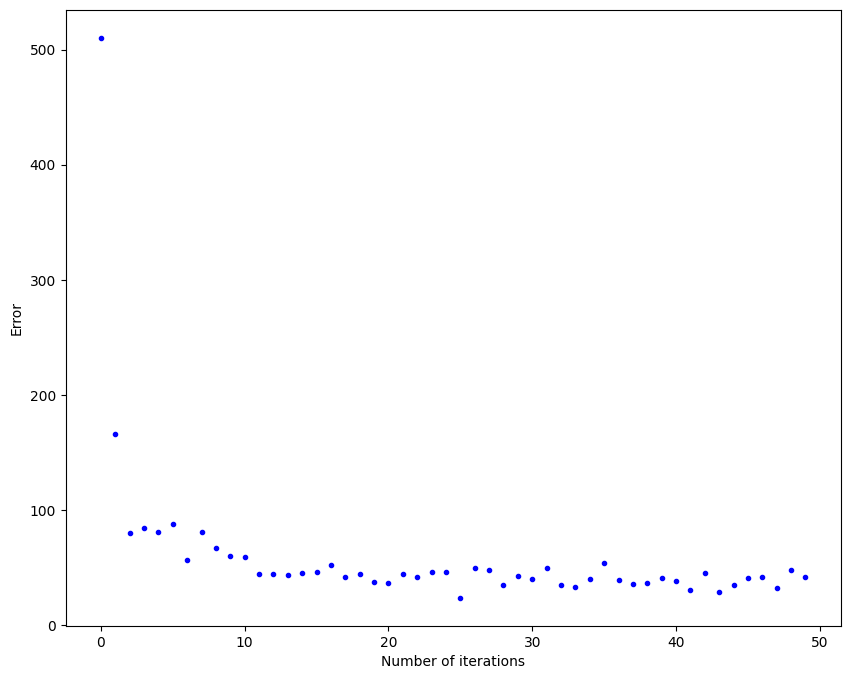

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


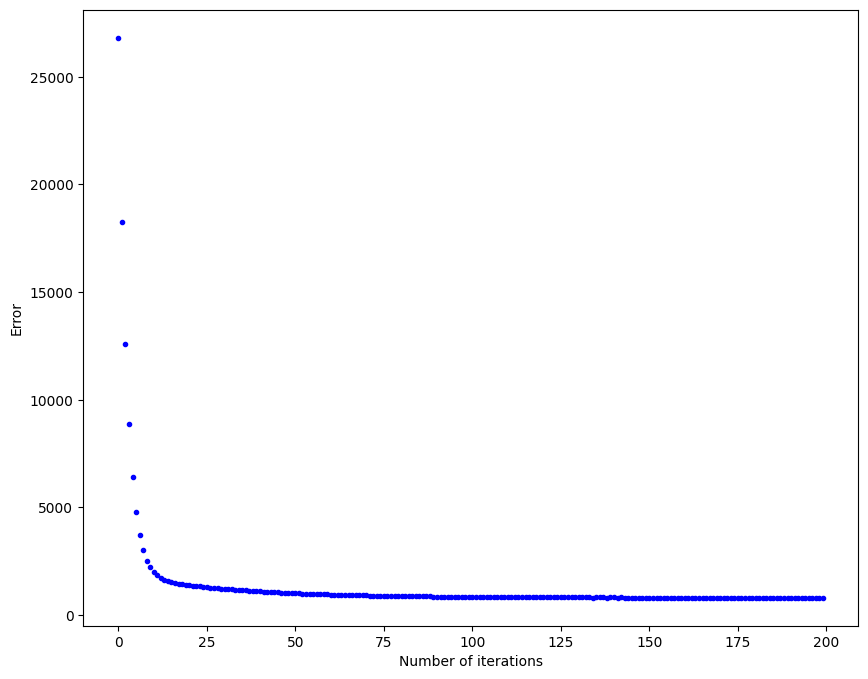

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.

2. Test all the three out on real datasets.

3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

4. Using the provided code for mini-batch gradient descent, experiment with different values of the batch_size parameter (e.g., 10, 30, 50). Describe how changing the batch size affects the convergence behavior and training speed of the algorithm. Does a smaller or larger batch size perform better in terms of both speed and convergence?

5. Take the code for batch gradient descent and stochastic gradient descent. Try adjusting the learning_rate parameter (e.g., 0.001, 0.01, 0.1) for both algorithms. Compare and contrast how changing the learning rate impacts the convergence speed and final error for each algorithm. Does a higher learning rate always lead to faster convergence?

**Answer-1**

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=[5,10,15,18,20,22]):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history
batch_size=[5,10,15,18,20,22]

for bs in range(len(batch_size)):

  y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size[bs])

  print('Result for batch size of {} is: '.format(batch_size[bs]))
  print('-------------------------')
  print('Final error: {:0.3f}'.format(cost_history[-1]), "\n")


Result for batch size of 5 is: 
-------------------------
Final error: 201.393 

Result for batch size of 10 is: 
-------------------------
Final error: 402.516 

Result for batch size of 15 is: 
-------------------------
Final error: 596.956 

Result for batch size of 18 is: 
-------------------------
Final error: 669.399 

Result for batch size of 20 is: 
-------------------------
Final error: 806.065 

Result for batch size of 22 is: 
-------------------------
Final error: 854.572 



**Answer-2**

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
faces = fetch_olivetti_faces()

# Get the data and target labels
X = faces.data
y = faces.target
X_b = np.c_[np.ones((X.shape[0], 1)), X]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
#cost function calculation
def cal_cost(y_pred, X, y):


    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))

    return cost

In [ ]:
#defining gradient descent function
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):


    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 400,400))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

In [ ]:
X_b = X_b.reshape(4097, 400)
print(X_b.shape, y.shape)

(4097, 400) (400,)


In [ ]:
lr = 0.001
n_iter = 200
y_pred = np.random.randn(400,1)
X_b = X_b.reshape(4097, 400)


y_pred, cost_history,y_pred_history= gradient_descent(X_b, y, y_pred, lr, n_iter)




In [ ]:
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 1.376
y_pred[1]: -1.067
Final error: 41897.525


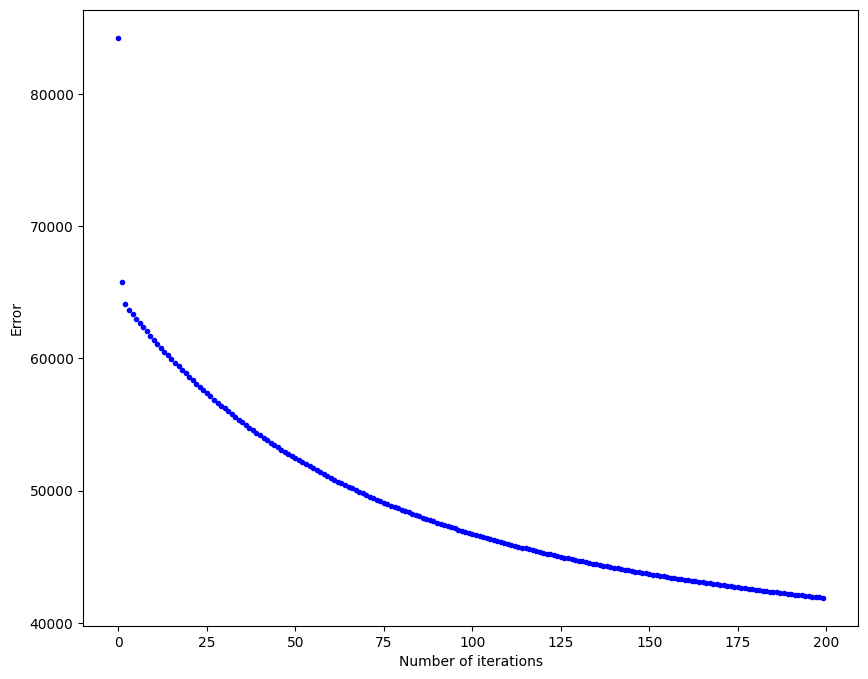

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(400,1)


ax.plot(range(n_iter), cost_history, 'b.')

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):

  m = len(y)
  cost_history = np.zeros(iterations)
  n_batches = int(m / batch_size)

  for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

  return y_pred, cost_history

lr = 0.01
n_iter = 1000
y_pred = np.random.randn(4097,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: -0.129
y_pred[1]: -0.596
Final error: 2425887.872


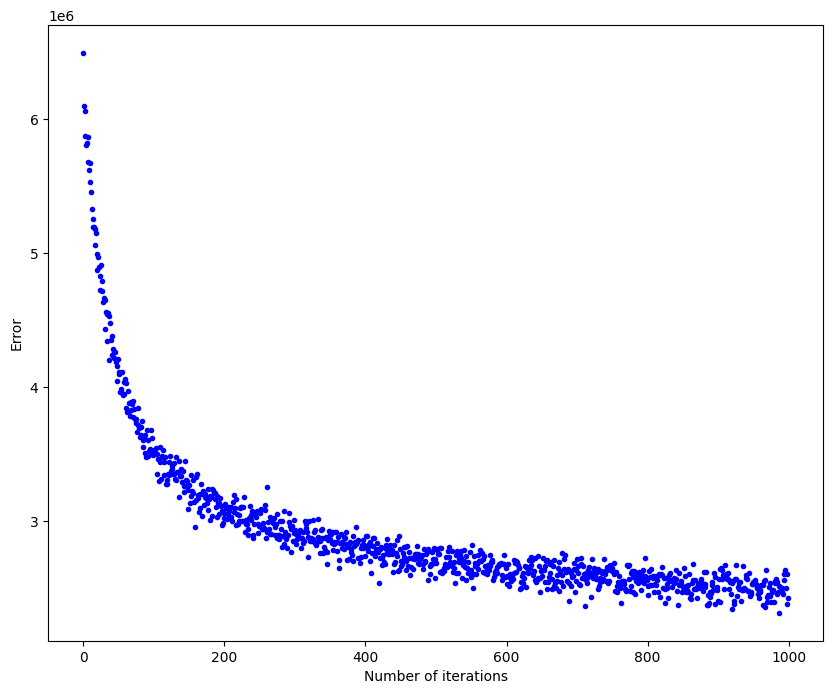

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(4097,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [ ]:

def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[-1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history


In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(4097, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 5.501
y_pred[1]: -0.851
Final error: 201725.049


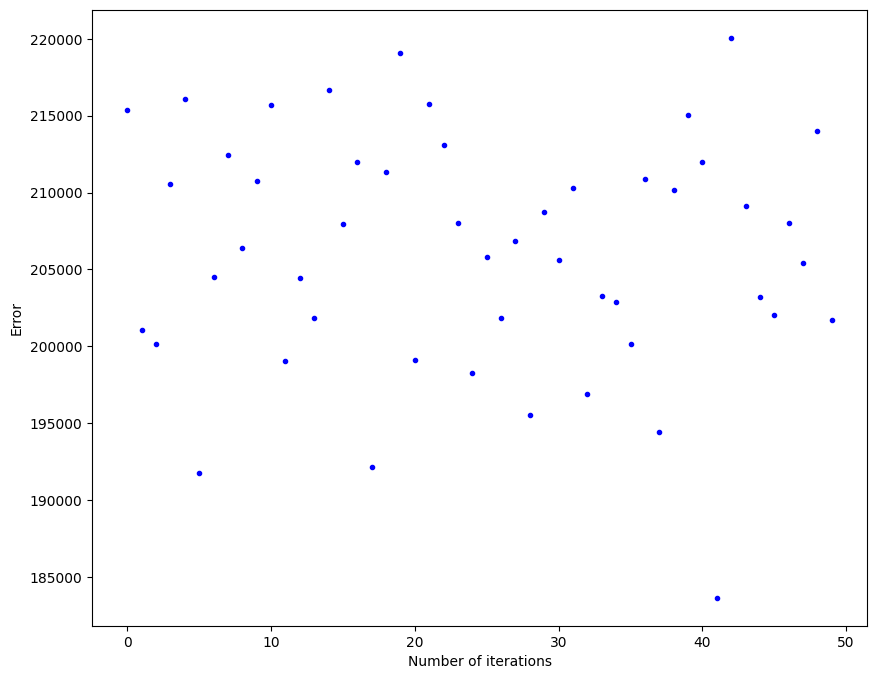

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

**Answer-3**

<ipython-input-45-74032d66fe7b>:30: RuntimeWarning: overflow encountered in square
  cost_history.append(np.mean(np.square(prediction - y)))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-45-74032d66fe7b>:29: RuntimeWarning: invalid value encountered in subtract
  y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
<ipython-input-45-74032d66fe7b>:45: RuntimeWarning: overflow encountered in square
  cost_history.append(np.mean(np.square(prediction - y_i)))
<ipython-input-45-74032d66fe7b>:44: RuntimeWarning: invalid value encountered in subtract
  y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i)))
<ipython-input-45-74032d66fe7b>:65: RuntimeWarning: overflow encountered in square
  cost_history.append(np.mean(np.square(prediction - y_i)))
<ipython-input-45-74032d66fe7b>:64: RuntimeWarning: invalid value encounte

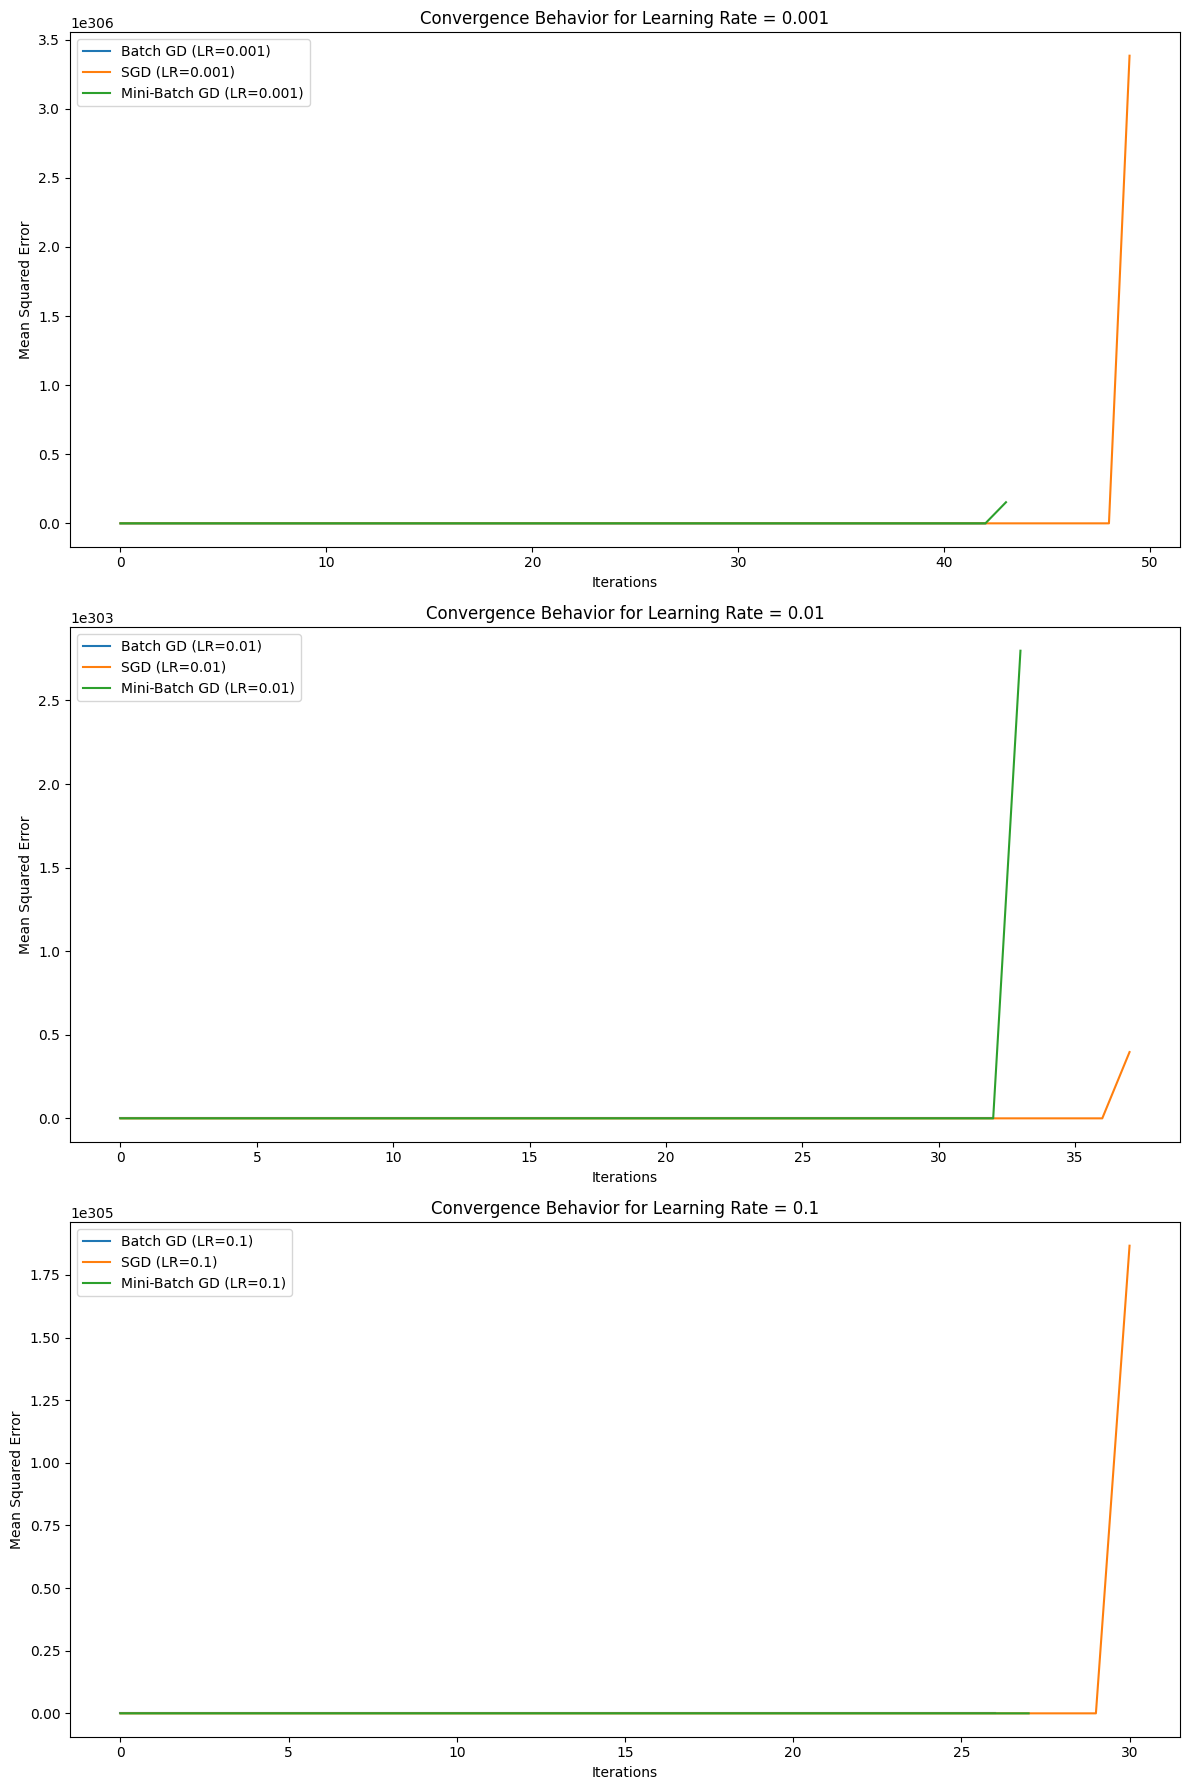

In [45]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Define the cost function (cal_cost) and gradient descent functions
def cal_cost(y_pred, X, y):



    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))

    return cost

def batch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = []

    for it in range(iterations):
        prediction = X.dot(y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history.append(np.mean(np.square(prediction - y)))

    return y_pred, cost_history

def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = []

    for it in range(iterations):
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i)))
            cost_history.append(np.mean(np.square(prediction - y_i)))

    return y_pred, cost_history

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100, batch_size=32):
    m = len(y)

    cost_history = []
    n_batches = int(m / batch_size)

    for it in range(iterations):
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - learning_rate * (X_i.T.dot((prediction - y_i))) / batch_size
            cost_history.append(np.mean(np.square(prediction - y_i)))

    return y_pred, cost_history

iterations = 1000
batch_size = 30

# Initialize y_pred with random values
y_pred = np.random.randn(X_b.shape[1], 1)
learning_rates = [0.001, 0.01, 0.1]


fig, axes = plt.subplots(len(learning_rates), 1, figsize=(12, 6 * len(learning_rates)))
for i, lr in enumerate(learning_rates):
  ax = axes[i]
  # Batch GD
  y_pred_batch, cost_history_batch = batch_gradient_descent(X, y, np.random.randn(X.shape[1], 1).copy(), lr, iterations)
  ax.plot(range(len(cost_history_batch)), cost_history_batch, label=f'Batch GD (LR={lr})')

  # SGD
  y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(X, y, np.random.randn(X.shape[1], 1).copy(), lr, iterations)
  ax.plot(range(len(cost_history_sgd)), cost_history_sgd, label=f'SGD (LR={lr})')

  # Mini-Batch GD
  y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(X, y, np.random.randn(X.shape[1], 1).copy(), lr, iterations, batch_size)

  ax.plot(range(len(cost_history_minibatch)), cost_history_minibatch, label=f'Mini-Batch GD (LR={lr})')

  ax.set_xlabel('Iterations')
  ax.set_ylabel('Mean Squared Error')
  ax.set_title(f'Convergence Behavior for Learning Rate = {lr}')
  ax.legend()
plt.tight_layout()
plt.show()


**Answer-4**

In [ ]:
import numpy as np

# Generate some random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

lr = 0.1
n_iter = 200
batch_size = [5, 10, 16, 30, 32, 50]

for bs in range(len(batch_size)):
    y_pred = np.random.randn(1, 1)  # Initialize y_pred with the correct shape

    y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size[bs])

    print('Result for batch size of {} is: '.format(batch_size[bs]))
    print('-------------------------')
    print('Final error: {:0.3f}'.format(cost_history[-1]), "\n")


Result for batch size of 5 is: 
-------------------------
Final error: 1.228 

Result for batch size of 10 is: 
-------------------------
Final error: 8.266 

Result for batch size of 16 is: 
-------------------------
Final error: 8.127 

Result for batch size of 30 is: 
-------------------------
Final error: 5.413 

Result for batch size of 32 is: 
-------------------------
Final error: 10.185 

Result for batch size of 50 is: 
-------------------------
Final error: 6.493 



**Answer-5**

In [ ]:
import numpy as np

# Generate some random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

learning_rates = [0.0001, 0.001, 0.01, 0.1]
n_iter = 1000

for lr in learning_rates:
    y_pred = np.random.randn(2, 1)
    X_b = np.c_[np.ones((len(X), 1)), X]
    cost_history = np.zeros(n_iter)
    y_pred_history = []  # Initialize as an empty list

    for it in range(n_iter):
        prediction = np.dot(X_b, y_pred)
        y_pred = y_pred - (1 / len(X)) * lr * (X_b.T.dot(prediction - y))
        cost_history[it] = np.mean((prediction - y) ** 2)
        y_pred_history.append(y_pred.copy())  # Append a copy of y_pred

    print('Result for learning_rate {}:'.format(lr))
    print('Final error: {:0.3f}'.format(cost_history[-1]))
    print('Number of iterations:', n_iter, "\n")


Result for learning_rate 0.0001:
Final error: 41.142
Number of iterations: 1000 

Result for learning_rate 0.001:
Final error: 1.630
Number of iterations: 1000 

Result for learning_rate 0.01:
Final error: 0.844
Number of iterations: 1000 

Result for learning_rate 0.1:
Final error: 0.840
Number of iterations: 1000 



In [ ]:
# For Stochastic_Gradient_Descent

learning_rate = [0.0001, 0.001, 0.01, 0.01]
n_iter = 1000

for lr in range(len(learning_rate)):
  y_pred = np.random.randn(2, 1)
  X_b = np.c_[np.ones((len(X), 1)), X]
  y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

  print('Result for the learning_rate  {} is: '.format(learning_rate[lr]))
  print('-------------------------')
  print('Final error: {:0.3f}'.format(cost_history[-1]), "\n")


Result for the learning_rate  0.0001 is: 
-------------------------
Final error: 5408.361 

Result for the learning_rate  0.001 is: 
-------------------------
Final error: 1973.901 

Result for the learning_rate  0.01 is: 
-------------------------
Final error: 1726.263 

Result for the learning_rate  0.01 is: 
-------------------------
Final error: 1794.243 



Batch Gradient Descent

Higher Learning Rate (e.g., 0.1):

1.  Faster convergence in many case.
2.  May overshoot the minimum or diverge if too high. Requires careful tuning.

Lower Learning Rate (e.g., 0.001):

1. More stable and robust. Less likely to diverge.
2. Slower convergence, especially on large datasets or complex models.

Stochastic Gradient Descent (SGD):

Higher Learning Rate (e.g., 0.1):

1. Faster updates and exploration of the parameter space.
2. High variance in updates can lead to convergence issues, especially for noisy data.